In [0]:
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Sequential

## Building Model

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

## Importing Dataset

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [5]:
(X_Train,Y_Train),(X_Test,Y_Test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def preprocess_data(X,Y):
    X = X.reshape((-1,28,28,1))
    X = X/255.0
    Y = to_categorical(Y)
    return X,Y

In [7]:
X_Train, Y_Train = preprocess_data(X_Train,Y_Train)
print(X_Train.shape,Y_Train.shape)

(60000, 28, 28, 1) (60000, 10)


In [8]:
X_Test, Y_Test = preprocess_data(X_Test,Y_Test)
print(X_Test.shape,Y_Test.shape)

(10000, 28, 28, 1) (10000, 10)


## Compiling Model

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
hist = model.fit(X_Train,Y_Train,epochs=20,validation_split=0.1,batch_size=128)

Epoch 1/20
422/422 [==============================] - 41s 98ms/step - loss: 0.3011 - accuracy: 0.9079 - val_loss: 0.0718 - val_accuracy: 0.9812
Epoch 2/20
422/422 [==============================] - 41s 97ms/step - loss: 0.0676 - accuracy: 0.9794 - val_loss: 0.0489 - val_accuracy: 0.9870
Epoch 3/20
422/422 [==============================] - 41s 97ms/step - loss: 0.0487 - accuracy: 0.9847 - val_loss: 0.0410 - val_accuracy: 0.9877
Epoch 4/20
422/422 [==============================] - 41s 97ms/step - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0406 - val_accuracy: 0.9880
Epoch 5/20
422/422 [==============================] - 41s 97ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0359 - val_accuracy: 0.9907
Epoch 6/20
422/422 [==============================] - 41s 97ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0326 - val_accuracy: 0.9912
Epoch 7/20
422/422 [==============================] - 40s 96ms/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0370 - val_accuracy:

In [0]:
#import numpy as np
#arr = []
#arr.append(X_Test[0])
#nparr = np.array(arr)
#print(nparr.shape)
#pred = model.predict_classes(nparr)

(1, 28, 28, 1)


In [0]:
#print(pred)

[7]


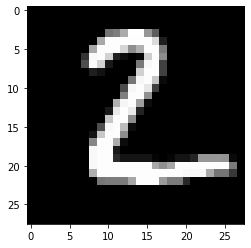

In [0]:
#import matplotlib.pyplot as plt
#plt.imshow(X_Test[1].reshape(28,28),cmap='gray')
#plt.show()

In [0]:
import tensorflow as tf

In [0]:
keras_file = "MNIST CNN Model"
model.save(keras_file)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: MNIST CNN Model\assets


In [0]:
converter = tf.lite.TFLiteConverter.from_saved_model(keras_file)

In [0]:
tflite_model = converter.convert()

In [0]:
open('mnist_cnn.tflite','wb').write(tflite_model)

377804